In [1]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

In [2]:
sample_rate, samples = wavfile.read('audio_normal.wav')
#downsampling to 10000Hz
sr = 9000
resampled = resample(samples.astype(np.float32),sample_rate,sr) 

#make sure every signal is within the range of (0,1)
samples_casted = resampled / (2.**15) 

seg_len = sr/40 #25ms
overlap = seg_len*0.6  #60% overlap
f, t, Zxx = signal.stft(samples_casted, fs = sr, nperseg = seg_len, noverlap = overlap)

Zxx_abs = np.abs(Zxx)
#plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.title('Normal Bee Sounds(sampling freq = 9000Hz)(25ms/frame with 60% overlap)')
#plt.show()

In [3]:
audio_normal = Zxx.real

In [4]:
audio_normal.shape

(113, 12001)

In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline


from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
cols = ['Normal?']
for i in range(len(f)):
    cols.append((str(f[i])+'Hz'))

In [8]:
A_data = np.array([[0.0 for i in range(len(f)+1)] for i in range(len(t))])
for i in range(1,len(t)):
    row = np.array([1.0])
    row = np.append(row, audio_normal[:,i])
    A_data[i] = row

In [9]:
df = pd.DataFrame(np.array([A_data[i] for i in range(len(t))]), columns = cols)

In [10]:
#Normal audio dataset
df

,Normal?,0.0Hz,40.0Hz,80.0Hz,120.0Hz,160.0Hz,200.0Hz,240.0Hz,280.0Hz,320.0Hz,...,4120.0Hz,4160.0Hz,4200.0Hz,4240.0Hz,4280.0Hz,4320.0Hz,4360.0Hz,4400.0Hz,4440.0Hz,4480.0Hz
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,2.798388e-08,5.576327e-09,1.090848e-07,-7.201653e-08,-2.838201e-07,1.728592e-07,-2.967306e-07,7.180624e-07,-1.355222e-06,...,-1.091505e-08,-1.624752e-08,2.402191e-08,-1.929670e-08,8.487664e-09,1.382240e-09,-4.552945e-09,3.565991e-11,6.913350e-10,6.218660e-10
2,1.0,1.013372e-07,-8.719756e-08,5.557780e-08,-1.329609e-07,5.919741e-07,-8.845926e-07,5.388841e-07,2.136082e-07,-2.042847e-08,...,-1.655382e-08,2.090730e-08,-1.391166e-08,7.819700e-09,3.866209e-09,-4.554006e-09,9.607399e-10,-5.687191e-10,-8.350596e-11,1.992530e-11
3,1.0,-1.051710e-08,8.339761e-08,-1.853686e-07,-1.020712e-08,1.012131e-06,-1.405251e-06,7.037756e-07,9.571603e-08,-8.835334e-07,...,1.566796e-08,-7.635947e-10,-1.470769e-08,9.661929e-09,4.305647e-10,-3.007523e-09,8.617873e-10,4.485602e-10,5.680414e-11,6.022150e-11
4,1.0,-4.405669e-08,-9.285765e-08,4.982902e-08,1.275029e-07,6.915845e-07,-1.424485e-06,5.326797e-07,1.790510e-07,1.630505e-07,...,-1.011389e-08,8.888438e-09,-9.941546e-09,-1.311204e-09,3.357508e-09,-7.644402e-10,1.337341e-09,-3.431092e-11,5.814018e-11,-1.179940e-10
5,1.0,-9.218352e-08,7.912892e-08,-1.163759e-07,-1.051364e-07,8.172712e-07,-8.065405e-07,-2.474749e-07,6.132854e-07,-3.637318e-07,...,-2.919314e-08,2.154727e-08,-2.722393e-08,2.954451e-08,-1.205373e-08,1.813427e-09,-1.507551e-09,7.334807e-10,-4.872034e-10,1.764374e-10
6,1.0,-5.463503e-08,2.542765e-07,-3.251594e-07,2.692918e-07,-3.951111e-07,-9.655028e-08,4.292126e-07,-9.201734e-08,5.479405e-07,...,-2.432875e-09,5.679914e-09,6.208191e-09,-2.042507e-08,1.126884e-08,-6.375663e-10,6.795244e-10,1.009660e-10,-3.107845e-10,1.031926e-10
7,1.0,1.771315e-07,-1.207765e-07,1.205983e-07,-2.011318e-07,-1.862211e-07,5.646435e-07,-3.199953e-07,-1.541857e-08,-1.928581e-07,...,-6.232799e-11,-3.138526e-09,7.752048e-09,-1.014712e-08,-8.329789e-10,1.116959e-09,1.023293e-09,1.987055e-10,1.269338e-10,4.944186e-13
8,1.0,1.048327e-07,-5.250695e-08,-5.627570e-08,-6.428563e-08,-5.035190e-09,5.997493e-07,-5.677099e-07,3.321863e-07,-2.560955e-07,...,1.513528e-09,4.160575e-09,-1.813418e-08,1.968152e-08,-9.606914e-09,3.526178e-09,-6.407571e-11,-7.440278e-10,3.787698e-10,-2.191028e-10
9,1.0,6.728715e-08,-4.727168e-08,-2.348135e-07,6.299138e-07,-7.507778e-07,4.446080e-07,-5.024065e-08,4.671341e-07,-8.389615e-07,...,6.736248e-09,1.159459e-08,-2.638199e-08,1.832735e-08,-7.817628e-09,5.332965e-09,-9.735504e-10,5.464004e-11,-3.221581e-10,-1.122490e-11


In [11]:
####################################################################

In [12]:
sample_rate, samples = wavfile.read('audio_abnormal.wav')
#downsampling to 9000Hz
sr = 9000
resampled = resample(samples.astype(np.float32),sample_rate,sr) 

#make sure every signal is within the range of (0,1)
samples_casted = resampled / (2.**15) 

seg_len = sr/40 #25ms
overlap = seg_len*0.6  #60% overlap
f, t, Zxx = signal.stft(samples_casted, fs = sr, nperseg = seg_len, noverlap = overlap)

Zxx_abs = np.abs(Zxx)
#plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.title('Abnormal Bee Sounds(sampling freq = 9000Hz)(25ms/frame with 60% overlap)')
#plt.show()

In [13]:
audio_abnormal = Zxx.real

In [15]:
audio_abnormal.shape

(113, 12001)

In [16]:
cols = ['Normal?']
for i in range(len(f)):
    cols.append((str(f[i])+'Hz'))

In [18]:
A_data = np.array([[0.0 for i in range(len(f)+1)] for i in range(len(t))])
for i in range(1,len(t)):
    row = np.array([0.0])
    row = np.append(row, audio_abnormal[:,i])
    A_data[i] = row

In [19]:
df_audio = pd.DataFrame(np.array([A_data[i] for i in range(len(t))]), columns = cols)

In [20]:
#abnormal audio dataset
df_audio

,Normal?,0.0Hz,40.0Hz,80.0Hz,120.0Hz,160.0Hz,200.0Hz,240.0Hz,280.0Hz,320.0Hz,...,4120.0Hz,4160.0Hz,4200.0Hz,4240.0Hz,4280.0Hz,4320.0Hz,4360.0Hz,4400.0Hz,4440.0Hz,4480.0Hz
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,3.213928e-08,-4.362996e-08,-2.094214e-07,3.511524e-07,-1.225482e-07,-1.167343e-07,6.503785e-07,-1.169528e-06,1.100806e-06,...,8.867842e-09,-4.272566e-08,3.712468e-08,-1.625997e-08,1.803562e-09,2.886543e-09,4.209372e-10,-1.734978e-10,-4.593302e-10,-5.594796e-10
2,0.0,-1.420271e-08,1.126493e-07,-6.138663e-07,1.010951e-06,-8.761718e-07,1.025854e-06,-8.884037e-07,-9.282221e-08,5.477221e-07,...,-5.499028e-09,4.685373e-09,6.648857e-09,-7.026450e-09,6.781944e-09,-5.767906e-09,7.590397e-10,4.656106e-11,2.974129e-11,-7.635379e-11
3,0.0,1.756550e-08,1.007705e-07,-2.973486e-07,1.426898e-07,-1.203835e-07,3.924673e-07,-3.206067e-07,3.552072e-07,-2.791796e-07,...,-7.012657e-09,5.764031e-09,8.480230e-09,-7.439100e-09,2.242318e-09,-6.304005e-09,2.785155e-09,1.324328e-09,-4.671067e-10,-9.444435e-11
4,0.0,-2.119932e-08,1.009255e-07,-1.529929e-07,-8.695208e-08,4.199779e-07,-9.167968e-07,8.457566e-07,6.613456e-07,-1.653433e-06,...,2.381749e-08,-3.248665e-08,2.089532e-08,-1.650718e-08,4.663387e-09,5.541634e-09,-6.353361e-09,2.722446e-09,-4.501348e-10,3.639563e-10
5,0.0,-1.663827e-08,1.809494e-07,-2.609428e-07,-9.731659e-08,3.376792e-07,-1.927568e-07,-2.898915e-07,9.613738e-07,-1.160137e-06,...,-4.666863e-08,5.980043e-08,-2.438175e-08,-2.179908e-10,6.917674e-09,-8.006739e-09,5.086955e-09,-3.598116e-09,5.084949e-10,6.954491e-11
6,0.0,6.390982e-08,-5.475815e-08,-2.904842e-07,7.106269e-07,-4.007845e-07,9.121690e-08,-3.045490e-07,2.035843e-07,2.361090e-07,...,-1.643914e-08,-3.530520e-08,5.059334e-08,-2.434512e-08,2.104231e-08,-1.321502e-08,2.995861e-10,2.678935e-10,4.407560e-10,2.434717e-11
7,0.0,-2.132680e-07,1.752621e-07,-3.317802e-07,2.157069e-07,6.191236e-07,-1.116640e-06,6.751330e-07,-5.717292e-07,1.319973e-06,...,1.017451e-08,-5.106342e-08,4.714304e-08,-1.898735e-08,9.035162e-09,-8.656252e-09,2.265362e-09,7.143497e-10,-4.044409e-11,-1.245983e-10
8,0.0,-1.303304e-07,6.285645e-08,1.445587e-07,6.964955e-08,-1.703660e-07,-4.368655e-07,4.559340e-07,4.285826e-07,-1.081975e-06,...,-4.360411e-08,1.954961e-08,-6.090959e-09,1.240392e-08,-1.097216e-08,6.267521e-10,3.792203e-10,7.880408e-10,-3.498011e-10,1.298603e-10
9,0.0,1.989079e-07,-2.064963e-07,5.296719e-07,-1.040056e-06,8.953705e-07,-1.760502e-07,3.745591e-08,4.327067e-08,-7.887537e-07,...,-3.051545e-08,3.391838e-08,-1.681822e-08,5.920399e-09,1.329502e-09,-1.352369e-09,3.013182e-10,1.635194e-10,-6.309532e-11,2.320978e-11


In [21]:
df_audio = df_audio.append(df)

In [22]:
#mixed dataset
df_audio

,Normal?,0.0Hz,40.0Hz,80.0Hz,120.0Hz,160.0Hz,200.0Hz,240.0Hz,280.0Hz,320.0Hz,...,4120.0Hz,4160.0Hz,4200.0Hz,4240.0Hz,4280.0Hz,4320.0Hz,4360.0Hz,4400.0Hz,4440.0Hz,4480.0Hz
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,3.213928e-08,-4.362996e-08,-2.094214e-07,3.511524e-07,-1.225482e-07,-1.167343e-07,6.503785e-07,-1.169528e-06,1.100806e-06,...,8.867842e-09,-4.272566e-08,3.712468e-08,-1.625997e-08,1.803562e-09,2.886543e-09,4.209372e-10,-1.734978e-10,-4.593302e-10,-5.594796e-10
2,0.0,-1.420271e-08,1.126493e-07,-6.138663e-07,1.010951e-06,-8.761718e-07,1.025854e-06,-8.884037e-07,-9.282221e-08,5.477221e-07,...,-5.499028e-09,4.685373e-09,6.648857e-09,-7.026450e-09,6.781944e-09,-5.767906e-09,7.590397e-10,4.656106e-11,2.974129e-11,-7.635379e-11
3,0.0,1.756550e-08,1.007705e-07,-2.973486e-07,1.426898e-07,-1.203835e-07,3.924673e-07,-3.206067e-07,3.552072e-07,-2.791796e-07,...,-7.012657e-09,5.764031e-09,8.480230e-09,-7.439100e-09,2.242318e-09,-6.304005e-09,2.785155e-09,1.324328e-09,-4.671067e-10,-9.444435e-11
4,0.0,-2.119932e-08,1.009255e-07,-1.529929e-07,-8.695208e-08,4.199779e-07,-9.167968e-07,8.457566e-07,6.613456e-07,-1.653433e-06,...,2.381749e-08,-3.248665e-08,2.089532e-08,-1.650718e-08,4.663387e-09,5.541634e-09,-6.353361e-09,2.722446e-09,-4.501348e-10,3.639563e-10
5,0.0,-1.663827e-08,1.809494e-07,-2.609428e-07,-9.731659e-08,3.376792e-07,-1.927568e-07,-2.898915e-07,9.613738e-07,-1.160137e-06,...,-4.666863e-08,5.980043e-08,-2.438175e-08,-2.179908e-10,6.917674e-09,-8.006739e-09,5.086955e-09,-3.598116e-09,5.084949e-10,6.954491e-11
6,0.0,6.390982e-08,-5.475815e-08,-2.904842e-07,7.106269e-07,-4.007845e-07,9.121690e-08,-3.045490e-07,2.035843e-07,2.361090e-07,...,-1.643914e-08,-3.530520e-08,5.059334e-08,-2.434512e-08,2.104231e-08,-1.321502e-08,2.995861e-10,2.678935e-10,4.407560e-10,2.434717e-11
7,0.0,-2.132680e-07,1.752621e-07,-3.317802e-07,2.157069e-07,6.191236e-07,-1.116640e-06,6.751330e-07,-5.717292e-07,1.319973e-06,...,1.017451e-08,-5.106342e-08,4.714304e-08,-1.898735e-08,9.035162e-09,-8.656252e-09,2.265362e-09,7.143497e-10,-4.044409e-11,-1.245983e-10
8,0.0,-1.303304e-07,6.285645e-08,1.445587e-07,6.964955e-08,-1.703660e-07,-4.368655e-07,4.559340e-07,4.285826e-07,-1.081975e-06,...,-4.360411e-08,1.954961e-08,-6.090959e-09,1.240392e-08,-1.097216e-08,6.267521e-10,3.792203e-10,7.880408e-10,-3.498011e-10,1.298603e-10
9,0.0,1.989079e-07,-2.064963e-07,5.296719e-07,-1.040056e-06,8.953705e-07,-1.760502e-07,3.745591e-08,4.327067e-08,-7.887537e-07,...,-3.051545e-08,3.391838e-08,-1.681822e-08,5.920399e-09,1.329502e-09,-1.352369e-09,3.013182e-10,1.635194e-10,-6.309532e-11,2.320978e-11


In [ ]:
####################PCA###################

In [23]:
df_audio.head()

,Normal?,0.0Hz,40.0Hz,80.0Hz,120.0Hz,160.0Hz,200.0Hz,240.0Hz,280.0Hz,320.0Hz,...,4120.0Hz,4160.0Hz,4200.0Hz,4240.0Hz,4280.0Hz,4320.0Hz,4360.0Hz,4400.0Hz,4440.0Hz,4480.0Hz
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,3.213928e-08,-4.362996e-08,-2.094214e-07,3.511524e-07,-1.225482e-07,-1.167343e-07,6.503785e-07,-1.169528e-06,1.100806e-06,...,8.867842e-09,-4.272566e-08,3.712468e-08,-1.625997e-08,1.803562e-09,2.886543e-09,4.209372e-10,-1.734978e-10,-4.593302e-10,-5.594796e-10
2,0.0,-1.420271e-08,1.126493e-07,-6.138663e-07,1.010951e-06,-8.761718e-07,1.025854e-06,-8.884037e-07,-9.282221e-08,5.477221e-07,...,-5.499028e-09,4.685373e-09,6.648857e-09,-7.026450e-09,6.781944e-09,-5.767906e-09,7.590397e-10,4.656106e-11,2.974129e-11,-7.635379e-11
3,0.0,1.756550e-08,1.007705e-07,-2.973486e-07,1.426898e-07,-1.203835e-07,3.924673e-07,-3.206067e-07,3.552072e-07,-2.791796e-07,...,-7.012657e-09,5.764031e-09,8.480230e-09,-7.439100e-09,2.242318e-09,-6.304005e-09,2.785155e-09,1.324328e-09,-4.671067e-10,-9.444435e-11
4,0.0,-2.119932e-08,1.009255e-07,-1.529929e-07,-8.695208e-08,4.199779e-07,-9.167968e-07,8.457566e-07,6.613456e-07,-1.653433e-06,...,2.381749e-08,-3.248665e-08,2.089532e-08,-1.650718e-08,4.663387e-09,5.541634e-09,-6.353361e-09,2.722446e-09,-4.501348e-10,3.639563e-10


In [ ]:
#Warning!!
#g = sns.pairplot(df_audio, hue="Normal?")

In [ ]:
print(df_audio.mean() )

In [ ]:
print(df_audio.std() )

In [9]:
#X: shifted dataset (each feature has mean value of zero)
X = audio - audio.mean()
#Z: shifted and standardized dataset 
Z = X / audio.std()
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
print("Size X = ", X.shape)
print("Size Sigma = ",S.shape)
print("Size U = ",U.shape)
print("Size Vt = ",Vt.shape)
print(S)
variances = S**2
V = Vt.T

Size X =  (113, 24001)
Size Sigma =  (113,)
Size U =  (113, 113)
Size Vt =  (113, 24001)
[  8.12838928e+02   7.48396545e+02   5.09411804e+02   4.18719360e+02
   3.88440216e+02   3.41844696e+02   3.03088074e+02   2.99723907e+02
   2.63565369e+02   2.57975403e+02   2.32353806e+02   2.17192108e+02
   2.06591965e+02   1.92833466e+02   1.82881760e+02   1.72800797e+02
   1.62383530e+02   1.48724670e+02   1.42346573e+02   1.32537430e+02
   1.21607437e+02   1.13626396e+02   1.04435844e+02   9.67959747e+01
   9.26645737e+01   9.01923523e+01   8.48768158e+01   8.02320328e+01
   7.46276474e+01   6.99541168e+01   6.54199753e+01   6.16566200e+01
   5.70245934e+01   5.39006729e+01   5.07212830e+01   4.81399269e+01
   4.60464935e+01   4.43720932e+01   4.20946350e+01   4.02025909e+01
   3.91291122e+01   3.84923096e+01   3.65772591e+01   3.50793114e+01
   3.42637978e+01   3.38304367e+01   3.30322075e+01   3.14168663e+01
   3.10471687e+01   3.02857018e+01   2.91465473e+01   2.90818882e+01
   2.78853836e

[24.36133072868591, 20.651687981484713, 9.56819534864076, 6.4645471886848966, 5.5634011816252142, 4.3087342790460665, 3.3871132980750964, 3.3123391277446435, 2.5613486905556893, 2.4538532771501935, 1.9906347541317326, 1.739322373866679, 1.5736887964522137, 1.3710611909203421, 1.2331979797169621, 1.1009903106785508, 0.97224554768657412, 0.81556399216663644, 0.7471125815804941, 0.64769284136763572, 0.54527087409971298, 0.47604771638037979, 0.40215288336806565, 0.34546704282618573, 0.31660626377348161, 0.29993797679577178, 0.2656257456611919, 0.23734911505908993, 0.20534848857419008, 0.18043408725911456, 0.15780208857230268, 0.14016882961870675, 0.11989923305594384, 0.10712242149508008, 0.094857671520606882, 0.085448193299218128, 0.078178105217115684, 0.07259586066601377, 0.06533494097442076, 0.059593665131286479, 0.056453646663823534, 0.054631099357090866, 0.049330365353074196, 0.045372649777599083, 0.04328754983287577, 0.042199490976645229, 0.040231590698330953, 0.0363929899341651, 0.03

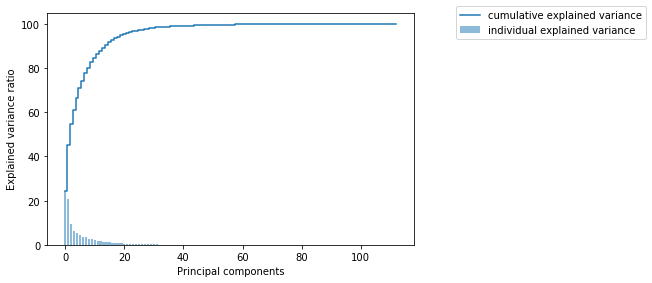

In [11]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)


plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

In [12]:
Zstar = Z@V[:,:36]

In [14]:
bee_p0 = Zstar[:,0]
bee_p1 = Zstar[:,1]

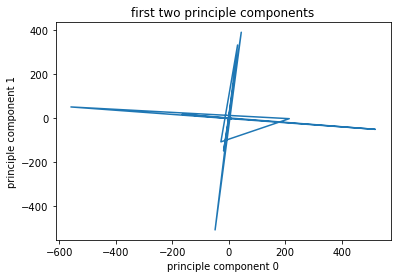

In [17]:
plt.plot(bee_p0, bee_p1)
plt.title("first two principle components")
plt.xlabel("principle component 0")
plt.ylabel("principle component 1")